# Feature Engineering and Modelling

---

1. Import packages
2. Load data
3. Modelling

---

## 1. Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---
## 2. Load data

In [3]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


---

## 3. Modelling



In [4]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Data sampling



In [5]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training



In [7]:
# Random Forest Model Training : 
rfm = RandomForestClassifier(n_estimators = 100,random_state = 42) # Model Initialization !
rfm.fit(X_train , y_train) # Model Training

RandomForestClassifier(random_state=42)

### Evaluation



In [8]:
# Generating prediction :

y_pred = rfm.predict(X_test)

### Calculating performance :

In [9]:
# Accuracy Score :

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy :{accuracy :.2%}\n")
print("--------------------------------------------\n")


# Confusion Matrix : 

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n",conf_matrix)
print("\n-----------------------------------------------")

# Classification Report : 

print(f"\n\nClassification Report:\n",classification_report(y_test, y_pred))

Random Forest Accuracy :90.39%

--------------------------------------------

Confusion Matrix:
 [[3282    4]
 [ 347   19]]

-----------------------------------------------


Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95      3286
           1       0.83      0.05      0.10       366

    accuracy                           0.90      3652
   macro avg       0.87      0.53      0.52      3652
weighted avg       0.90      0.90      0.86      3652



## Feature Importance :

In [11]:
feature_importance = rfm.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_features = [df.columns[i] for i in sorted_indices]

### plotting Feature Importance :

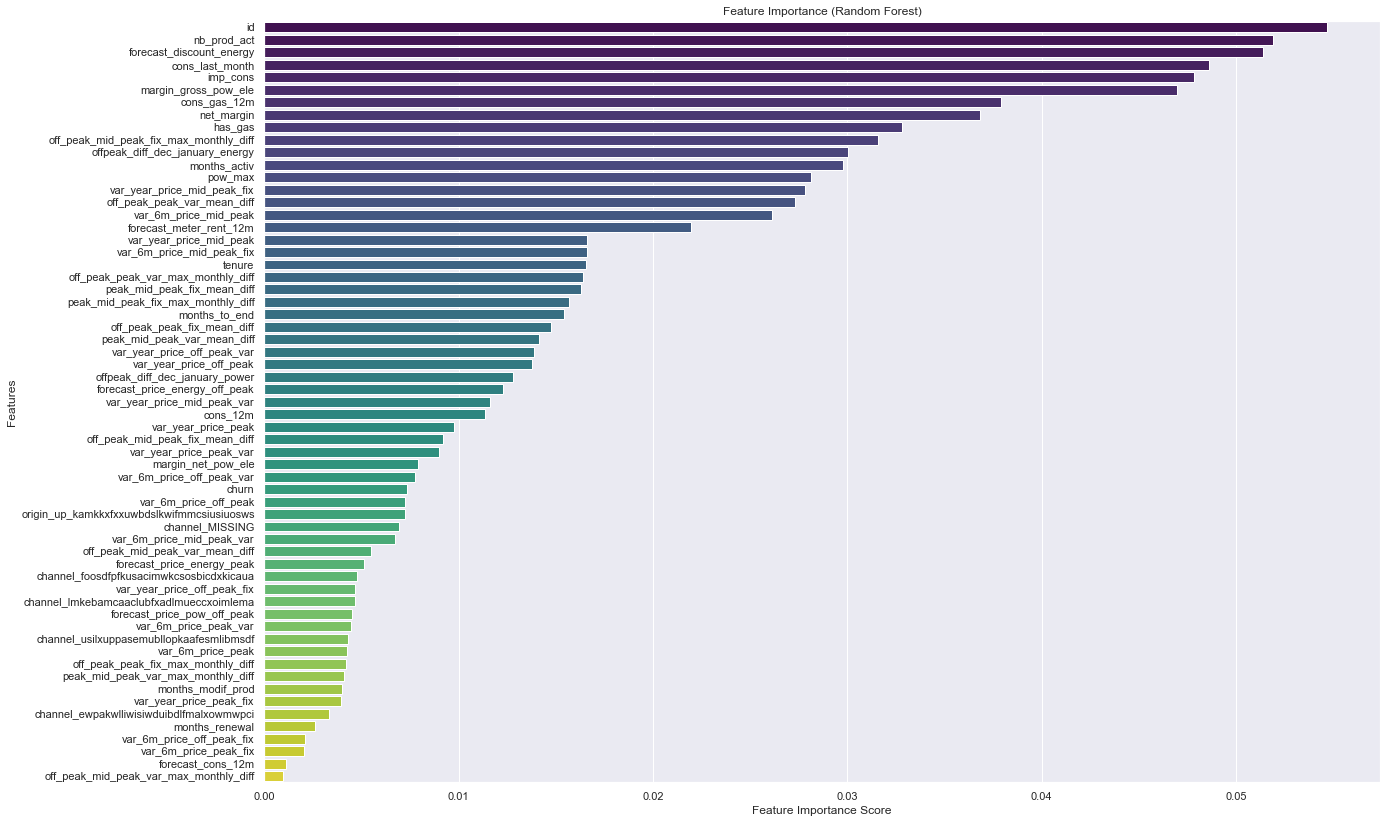

In [18]:
plt.figure(figsize = (20,14))
sns.barplot(x = feature_importance[sorted_indices], y = sorted_features, palette = "viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance (Random Forest)")
plt.show()

# Conclusion:

## Top 3 Most Important feature (Key Churn Drivers) :

### 1. Customer Tenure (num_years_antig) --- Highest Importance :

#### Insight: Customers with shorter tenure are more likely to churn.
####  Reason: New customers may not have built strong loyalty yet.
###  Actionable Steps:
#### 1. Implement loyalty programs for new customers.
#### 2. Offer discounts or incentives after the first year.

### 2. Fixed Peak Price (price_peak_fix) --- Strong Impact :

#### Insight: Higher peak prices increase churn risk.
#### Reason: Customers may be switching to cheaper competitors.
###  Actionable Steps :
#### Introduce discounted peak-time rates.
#### Offer flexible pricing plans based on usage behavior.

### 3.Net Margin (margin_net_pow_ele) – High-Margin Customers Churn More

#### Insight: Customers generating higher revenue tend to leave.
#### Reason: They might feel they are paying too much for the service.
###  Actionable Steps :
#### Offer exclusive perks for high-margin customers.
#### Improve customer satisfaction for premium users.